In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
# import tushare as ts
import QUANTAXIS as QA
import talib as ta
import datetime, time
from tqdm import tqdm_notebook

In [9]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('ggplot')

In [ ]:
index_all = QA.QA_fetch_index_list_adv()
index_all.to_csv('data/index.csv', encoding='utf_8_sig')

In [ ]:
index_list=['880490','880916','000025','000807',
            '399989','000934','000001','880230','880911','880202']
data_min = QA.QA_fetch_index_min_adv(index_all.index.tolist(), 
                                     '2019-01-01', '2019-02-01', '5min')
index_vol_sorted = data_min.volume.groupby(level=1).mean().\
sort_values(ascending=False)
index_all.loc[index_vol_sorted.index[51:100]].name
index_range_sorted = data_min.price.groupby(level=1).apply(lambda x:(x/x[0])).\
groupby(level=1).std().sort_values()
index_range_sorted.head(20)
index_all.loc[index_range_sorted.index[:20]].name

002366

In [3]:
code = '002366'
start = '2018-01-01'
end = '2018-12-31'

In [4]:
data_min = QA.QA_fetch_stock_min_adv(code, start, end, '15min')

In [5]:
data_min = data_min.to_qfq()

In [ ]:
# QA.QA_indicator_RSI()

In [6]:
ind = data_min.add_func(QA.QA_indicator_RSI)

In [8]:
# ind.index = ind.index.droplevel(1)
# 我需要看下出信号的点在实际k线图上是什么样的

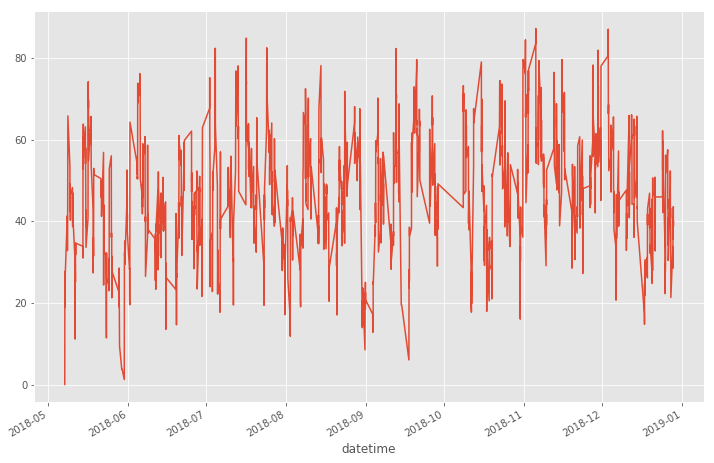

In [11]:
ind.xs(code, level=1).RSI1.plot();

In [7]:
data_min.kline_echarts()

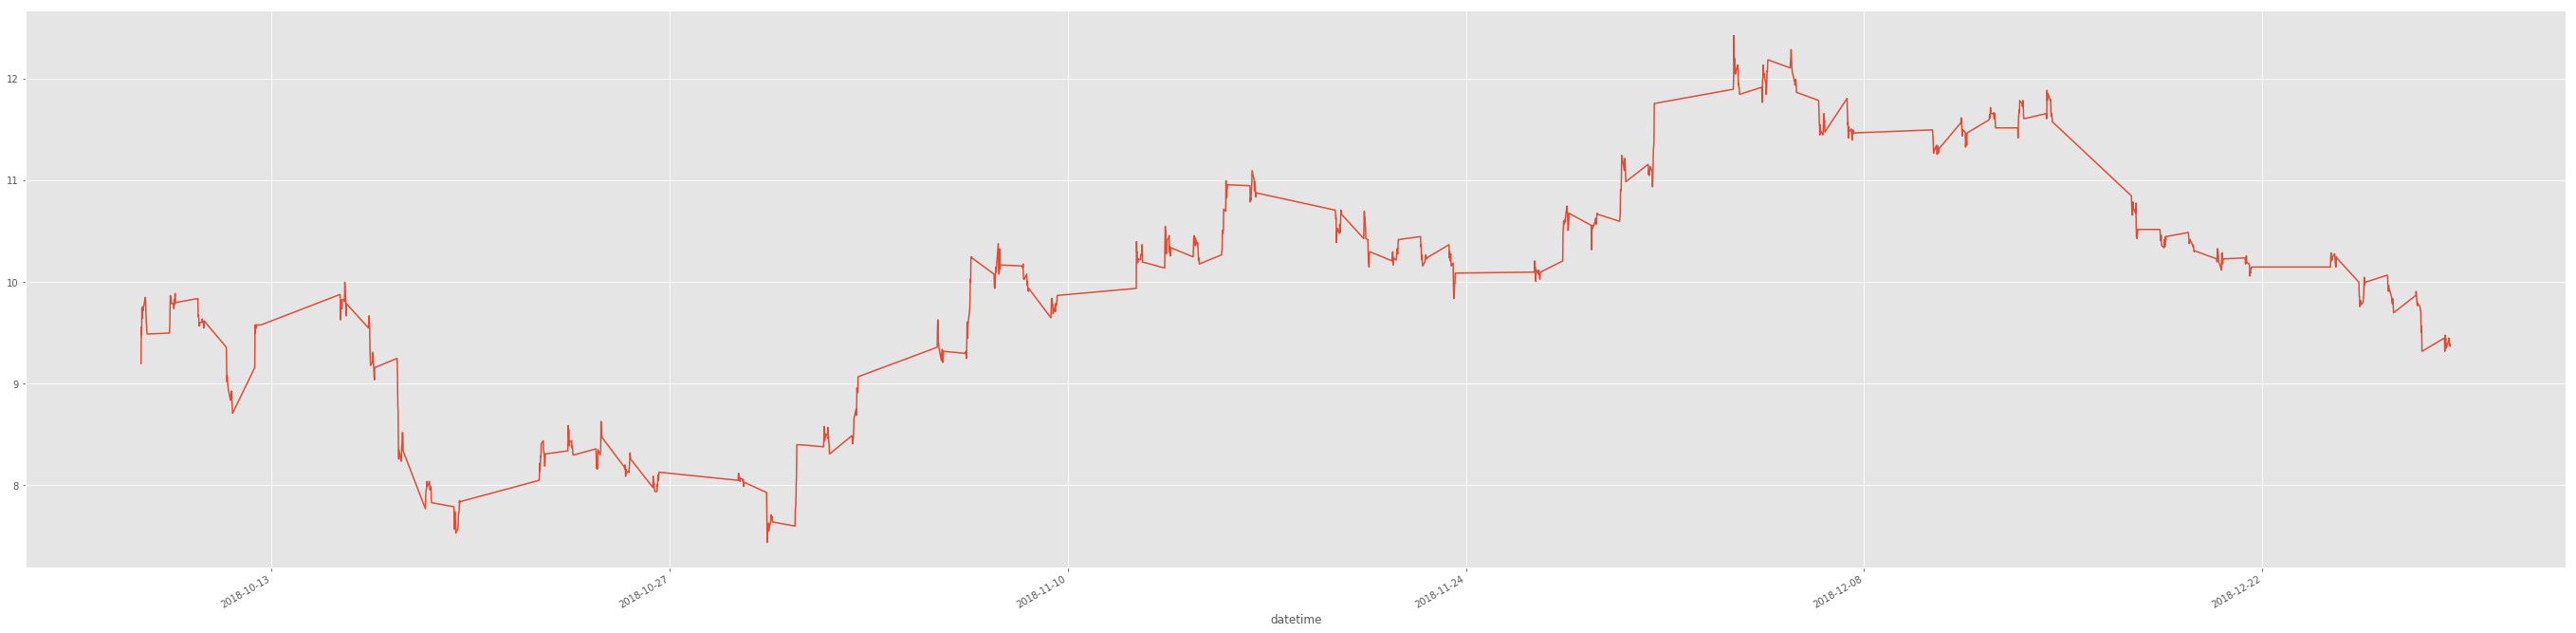

In [42]:
data_min.close.xs(code, level=1)['2018-10':'2018-12'].plot();

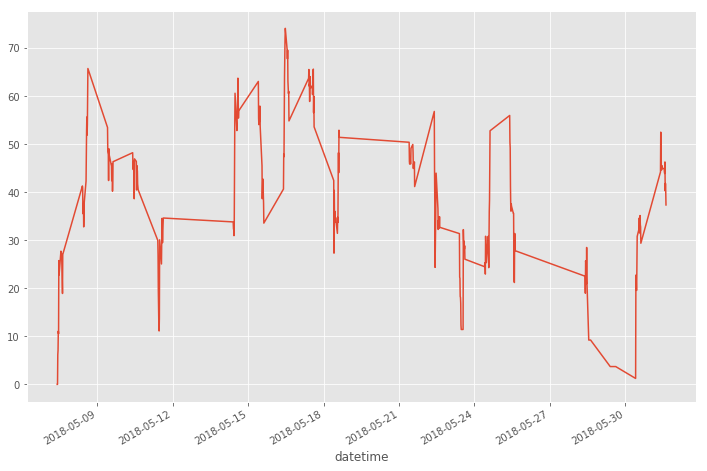

In [38]:
ind.xs(code, level=1)['2018-05'].RSI1.plot();

In [13]:
data_close = data_min.close.xs(code, level=1)

In [9]:
data_close.head()

datetime
2018-05-07 09:45:00    24.883018
2018-05-07 10:00:00    24.705141
2018-05-07 10:15:00    24.833608
2018-05-07 10:30:00    24.853372
2018-05-07 10:45:00    24.932428
Name: close, dtype: float64

In [51]:
ind_min = (data_close <= data_close.shift(1)) &\
(data_close.shift(1) <= data_close.shift(2)) &\
(data_close <= data_close.shift(-1)) &\
(data_close.shift(-1) <= data_close.shift(-2))

In [49]:
ind_min = (data_close <= data_close.shift(1)) &\
(data_close <= data_close.shift(2)) &\
(data_close <= data_close.shift(-1)) &\
(data_close <= data_close.shift(-2))

In [53]:
ind_min = (data_close <= data_close.shift(1)) &\
(data_close <= data_close.shift(2)) &\
(data_close <= data_close.shift(3)) &\
(data_close <= data_close.shift(-1)) &\
(data_close <= data_close.shift(-2)) &\
(data_close <= data_close.shift(-3))

In [55]:
ind_min = (data_close <= data_close.shift(1)) &\
(data_close <= data_close.shift(2)) &\
(data_close <= data_close.shift(3)) &\
(data_close <= data_close.shift(4)) &\
(data_close <= data_close.shift(-1)) &\
(data_close <= data_close.shift(-2)) &\
(data_close <= data_close.shift(-3)) &\
(data_close <= data_close.shift(-4))

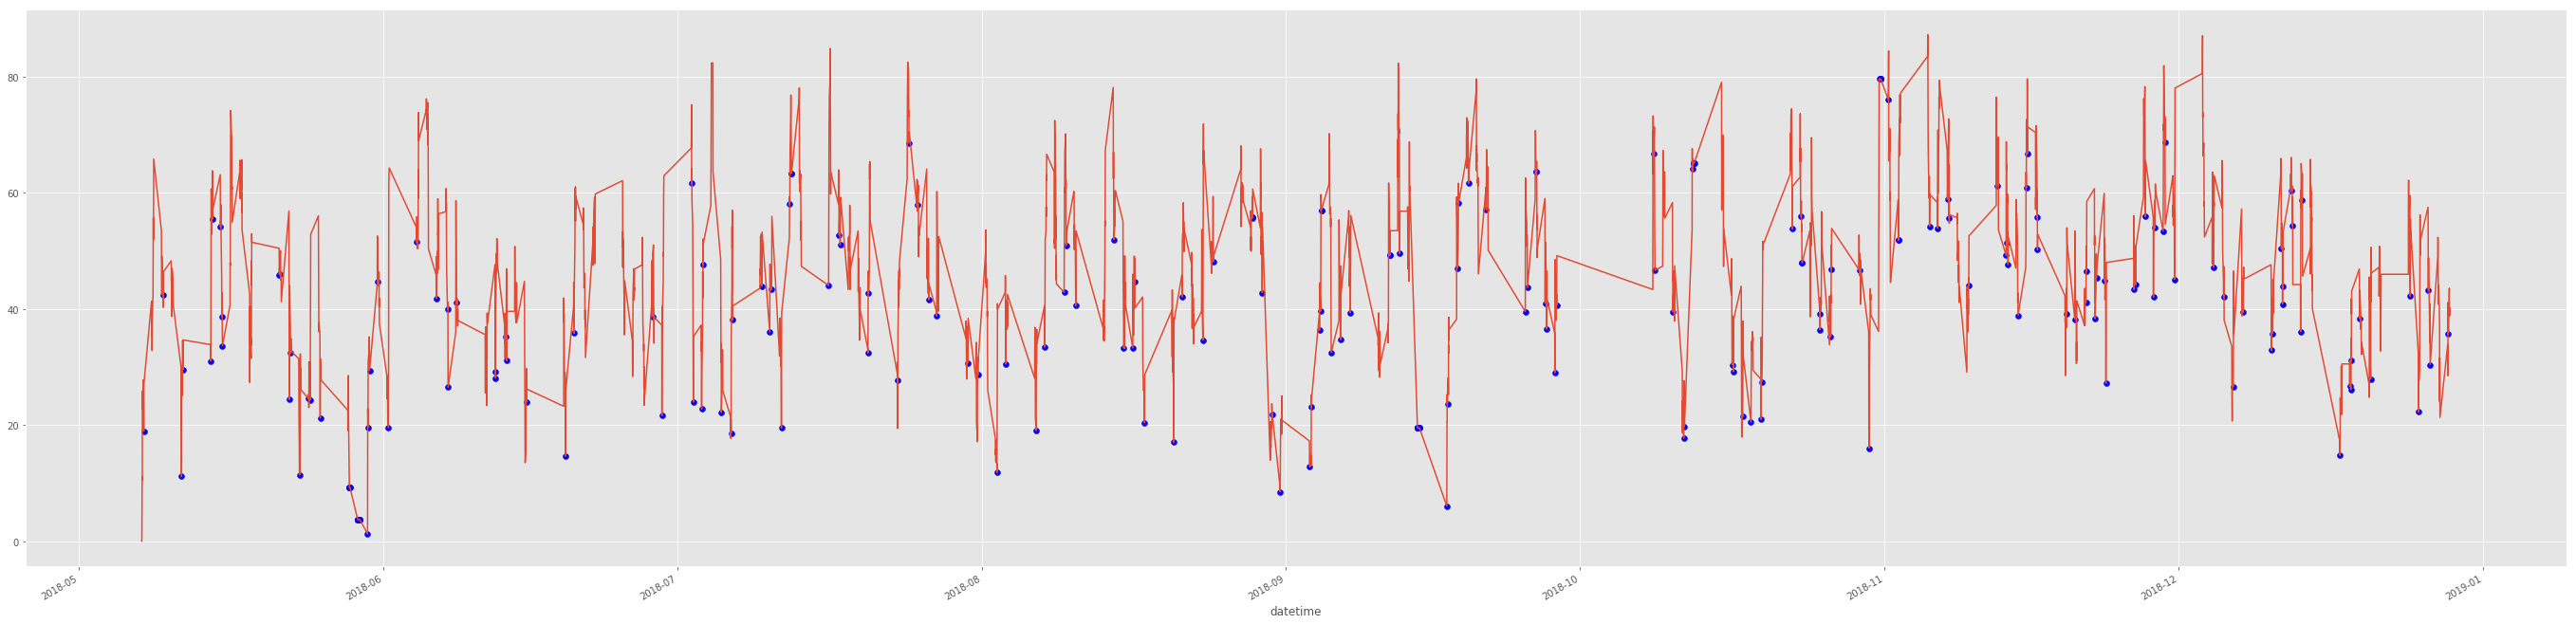

In [40]:
plt.rcParams['figure.figsize'] = [48, 12]
x = ind.xs(code, level=1)[ind_min].RSI1.index
y = ind.xs(code, level=1)[ind_min].RSI1.values
ind.xs(code, level=1).RSI1.plot();
plt.scatter(x, y, c='b');

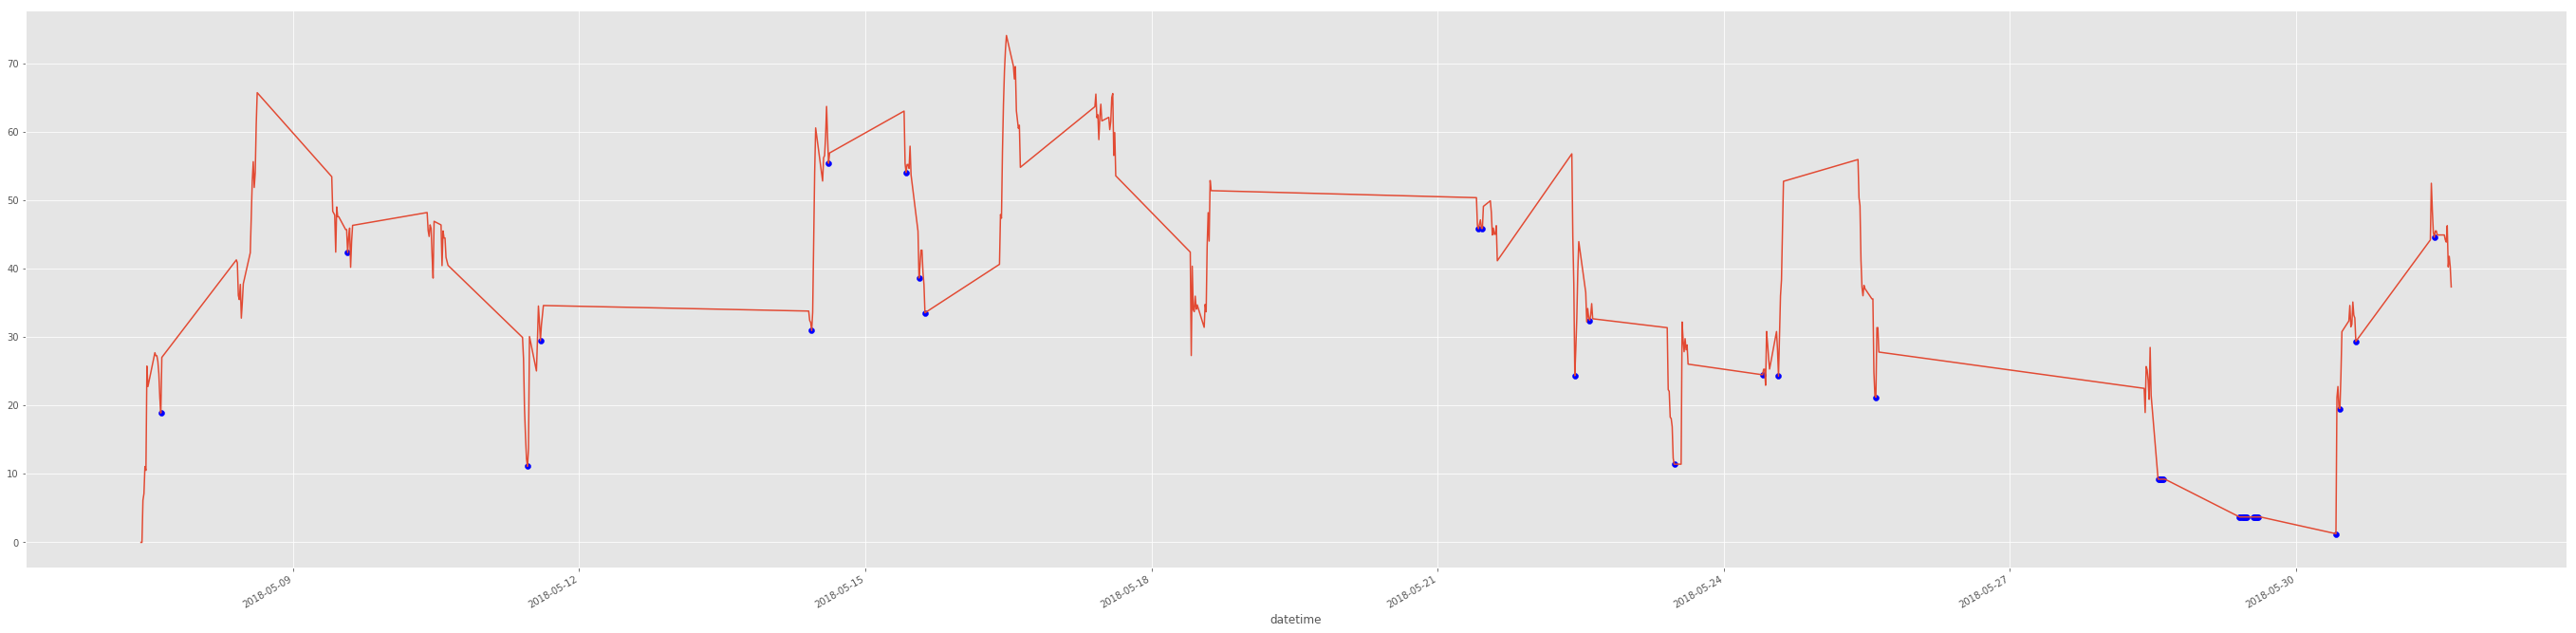

In [52]:
plt.rcParams['figure.figsize'] = [48, 12]
x = ind.xs(code, level=1)[ind_min]['2018-05'].RSI1.index
y = ind.xs(code, level=1)[ind_min]['2018-05'].RSI1.values
ind.xs(code, level=1)['2018-05'].RSI1.plot();
plt.scatter(x, y, c='b');

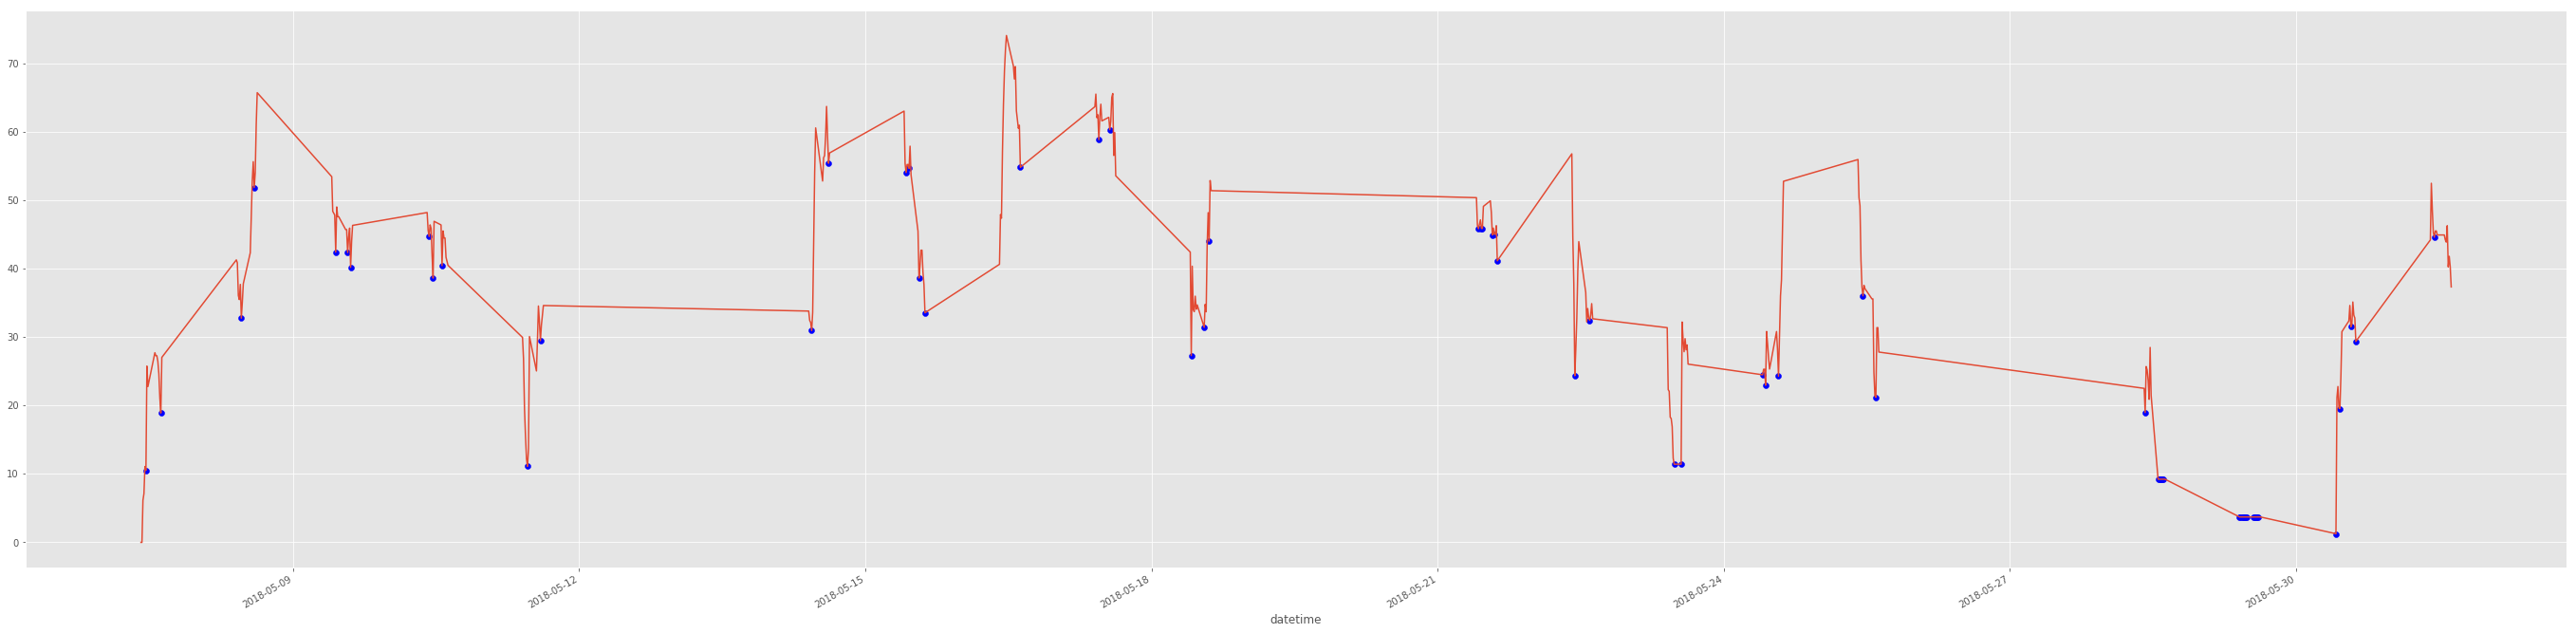

In [50]:
plt.rcParams['figure.figsize'] = [48, 12]
x = ind.xs(code, level=1)[ind_min]['2018-05'].RSI1.index
y = ind.xs(code, level=1)[ind_min]['2018-05'].RSI1.values
ind.xs(code, level=1)['2018-05'].RSI1.plot();
plt.scatter(x, y, c='b');

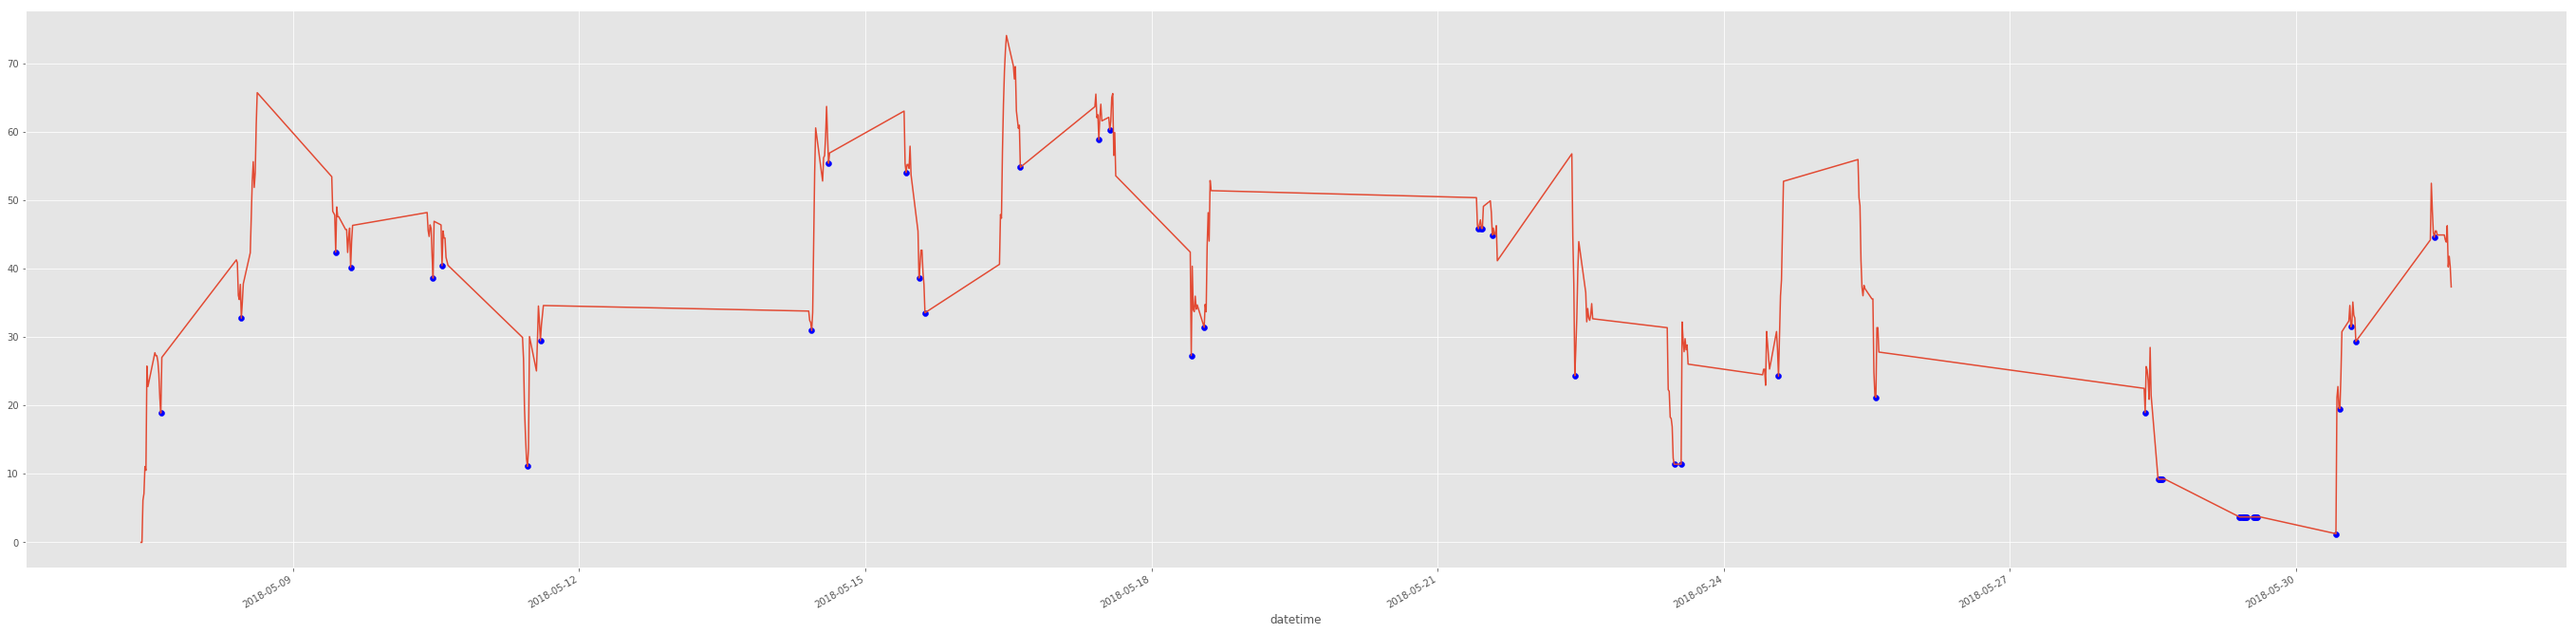

In [54]:
x = ind.xs(code, level=1)[ind_min]['2018-05'].RSI1.index
y = ind.xs(code, level=1)[ind_min]['2018-05'].RSI1.values
ind.xs(code, level=1)['2018-05'].RSI1.plot();
plt.scatter(x, y, c='b');

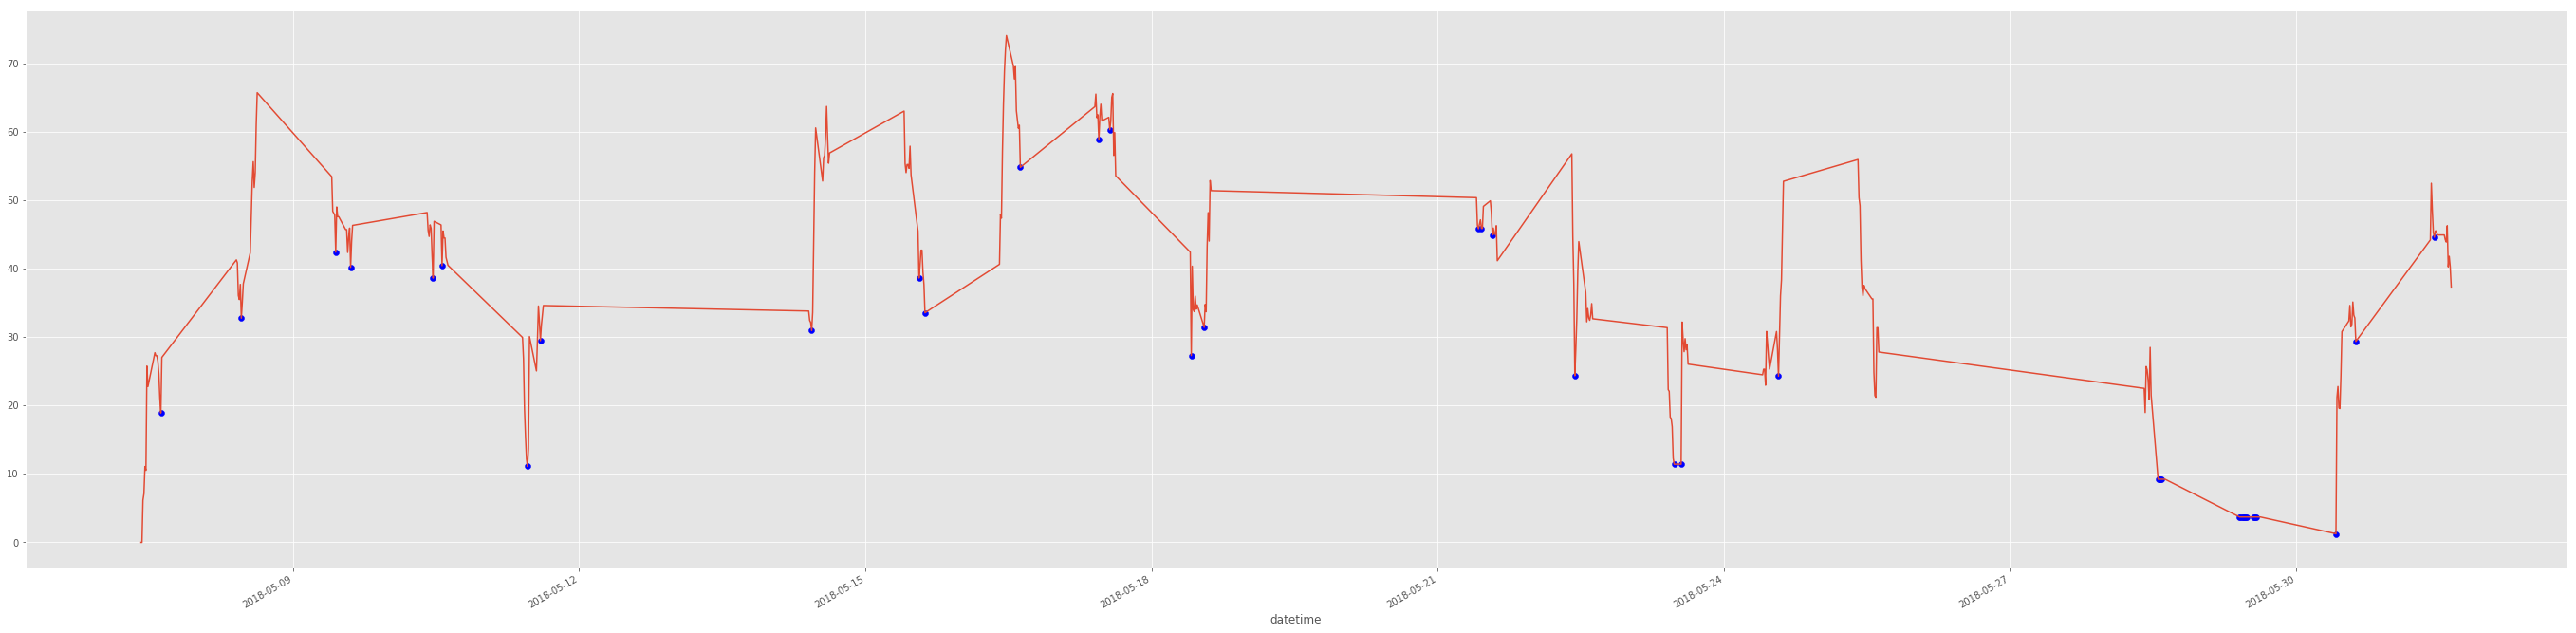

In [56]:
x = ind.xs(code, level=1)[ind_min]['2018-05'].RSI1.index
y = ind.xs(code, level=1)[ind_min]['2018-05'].RSI1.values
ind.xs(code, level=1)['2018-05'].RSI1.plot();
plt.scatter(x, y, c='b');

In [41]:
# ind.xs(code, level=1)[ind_min].plot.scatter();

In [49]:
ind.xs(code, level=1)[ind_min].describe()

,RSI1,RSI2,RSI3
count,235.000000,235.000000,235.000000
mean,37.313604,40.068371,35.848558
std,18.601349,14.642814,20.193253
min,1.240260,5.381190,0.515141
25%,21.956644,30.076183,18.981715
50%,38.791205,41.801225,35.486986
75%,50.589337,51.524198,49.093061
max,79.590207,64.470353,85.592589


In [50]:
ind.xs(code, level=1)[ind_min].median()

RSI1    38.791205
RSI2    41.801225
RSI3    35.486986
dtype: float64

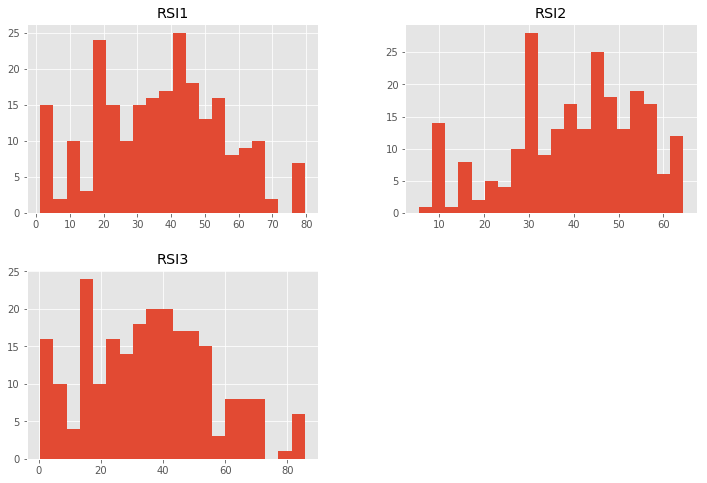

In [28]:
ind.xs(code, level=1)[ind_min].hist(bins=20);

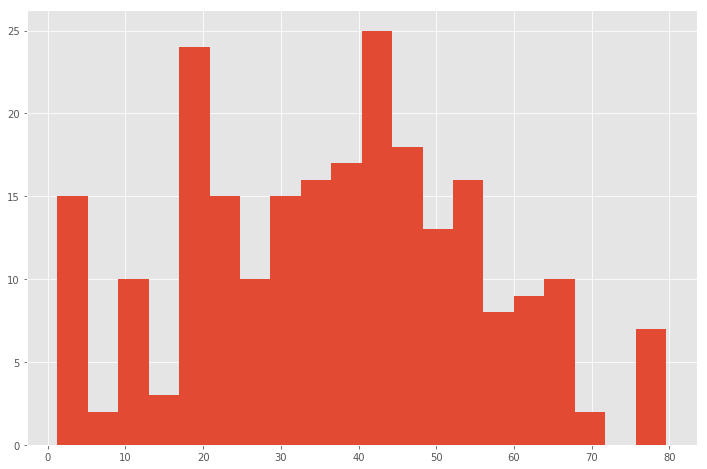

In [29]:
num_min, interval_min, _ = plt.hist(ind.xs(code, level=1)[ind_min].RSI1, bins=20);

In [26]:
print(interval_min[4], interval_min[5])

16.9102496376 20.8277469587


In [27]:
(interval_min[4] + interval_min[5]) / 2

18.868998298150963

In [31]:
ind_max = (data_close >= data_close.shift(1)) &\
(data_close.shift(1) >= data_close.shift(2)) &\
(data_close >= data_close.shift(-1)) &\
(data_close.shift(-1) >= data_close.shift(-2))

In [45]:
ind.xs(code, level=1)[ind_max].describe()

,RSI1,RSI2,RSI3
count,222.000000,222.000000,222.000000
mean,48.458292,45.131905,50.451491
std,21.447265,16.179141,23.622434
min,3.715286,8.875466,2.423205
25%,34.981819,34.241412,36.554566
50%,52.199924,47.077599,54.047433
75%,63.734714,57.218422,67.755885
max,87.213993,78.212541,90.463796


In [47]:
ind.xs(code, level=1)[ind_max].median()

RSI1    52.199924
RSI2    47.077599
RSI3    54.047433
dtype: float64

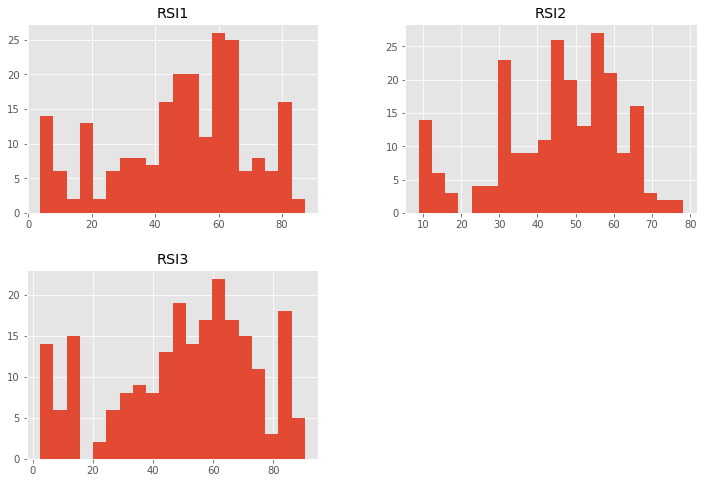

In [32]:
ind.xs(code, level=1)[ind_max].hist(bins=20);

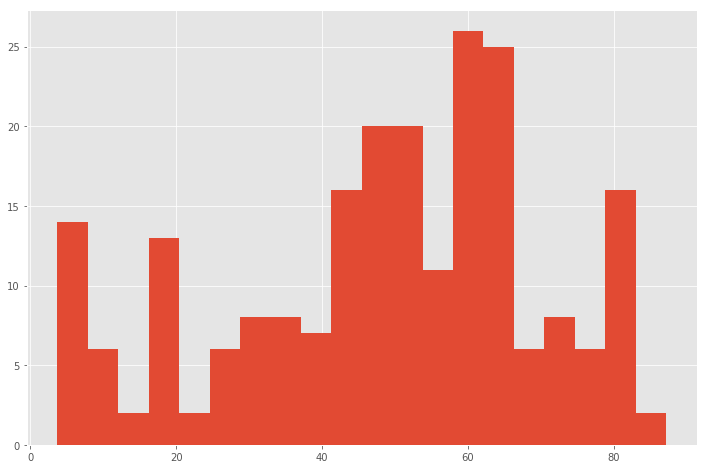

In [33]:
num_max, interval_max, _ = plt.hist(ind.xs(code, level=1)[ind_max].RSI1, bins=20);

In [34]:
interval_max

array([  3.71528585,   7.89022123,  12.06515661,  16.24009199,
        20.41502737,  24.58996275,  28.76489813,  32.93983351,
        37.11476889,  41.28970427,  45.46463965,  49.63957503,
        53.81451041,  57.98944579,  62.16438117,  66.33931655,
        70.51425193,  74.68918732,  78.8641227 ,  83.03905808,  87.21399346])

In [36]:
(interval_max[13] + interval_max[14]) / 2

60.076913484320727

In [42]:
ind_atr = data_min.add_func(QA.QA_indicator_ATR, 80)

In [43]:
ind_atr.tail()

,,TR,ATR
datetime,code,,
2018-12-28 14:00:00,002366,0.04,0.100375
2018-12-28 14:15:00,002366,0.07,0.100375
2018-12-28 14:30:00,002366,0.08,0.100125
2018-12-28 14:45:00,002366,0.08,0.099250
2018-12-28 15:00:00,002366,0.07,0.099125


In [44]:
ind_atr.describe()

,TR,ATR
count,2607.000000,2528.000000
mean,0.139939,0.138880
std,0.118962,0.031871
min,0.000000,0.080045
25%,0.070000,0.113397
50%,0.110000,0.136746
75%,0.167995,0.158000
max,1.976411,0.237911
